In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 1000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.1 # Mixing parameter
avg_deg = 25 # Average Degree
max_deg = int(0.1*n) # Max Degree
min_commu = 60 # Min Community Size
max_commu = int(0.1*n) # Max Community Size

G0 = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=7
)
### 去掉 G 中的重边和自环 
G0 = nx.Graph(G0) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G0)) # a list of self loops

G0.remove_edges_from(selfloop_edges) # Remove self-loops

In [3]:
import numpy as np
intrinsic_communities = {frozenset(G0.nodes[v]["community"]) for v in G0}
intrinsic_membership = np.empty(G0.number_of_nodes(), dtype=int)
for node in range(G0.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break

In [4]:
import os
from datetime import date
def generate_output(disturb: bool, filename):
    # Generate the folder name with the current date
    if disturb:   
        folder_name = f"Graph_Rmv_Stoch_{date.today()}"
    else:
        folder_name = f"Graph_Rmv_Btwn_{date.today()}"

    # Create the output directory if it doesn't exist
    output_dir = os.path.join(os.getcwd(), folder_name)
    os.makedirs(output_dir, exist_ok=True)

    # Construct the full file path
    file_path = os.path.join(output_dir, filename)
    
    return file_path

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

def quar_plot(scores, disturb: bool, filename, win:10):
    data = scores
    # Extract x and y coordinates for each curve
    x = range(len(data))  # Use the length of data as x-coordinates
    y = list(zip(*data))  # Transpose the data matrix

    # Compute rolling mean with a window size of win
    y_smoothed = [pd.Series(curve).rolling(window=win, min_periods=1).mean() for curve in y]
    #print(y_smoothed)
    # Create subplots
    fig, axs = plt.subplots(len(y_smoothed), 1, sharex=True)

    # Plot each curve with smoothed data on a separate subplot
    ylabel = ["NMI Eucl", "NMI Cosn", "ECS Eucl", "ECS Cosn"]

    for i, curve in enumerate(y_smoothed):
        axs[i].plot(x, curve)
        axs[i].set_ylabel(ylabel[i]) 
        axs[i].yaxis.set_major_formatter(StrMethodFormatter('{x:.3f}'))
    
    # Add x-axis label to the last subplot
    axs[-1].set_xlabel('Number of Removed Vertices')

    # Adjust spacing between subplots
    plt.tight_layout()
    
    file_path = generate_output(disturb, filename+".png")
    plt.savefig(file_path)    
    
    # Show the plot
    plt.show()

In [6]:
import os
import csv
from datetime import date

def save_scores_to_csv(scores, disturb: bool, filename):
    """
    Saves a list of 4-lists to a CSV file with a double space separator.
    
    Args:
        scores (list): The list of 4-lists to be saved.
        filename (str): The name of the output CSV file.
    """
    # Construct the full file path
    file_path = generate_output(disturb, filename+".csv")

    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file, delimiter=' ')
        for score_list in scores:
            writer.writerow(score_list)

In [7]:
betweenness = nx.betweenness_centrality(G0)
temp = sorted(betweenness, key=betweenness.get, reverse=True)

In [8]:
from auxpack.eval_embd import eval_embd as EE
from clusim.clustering import Clustering

D=20
K = len(np.unique(intrinsic_membership))
wk=64
#Measure = []
#remain_nodes = np.array(range(G.number_of_nodes()))

Vertex 917 is removed. NMI&ECS: [0.948036655647829, 0.9885139761685774, 0.8746140195887603, 0.9864615079400025]
Vertex 297 is removed. NMI&ECS: [0.9445555609209234, 0.9885028112337144, 0.8732541700807973, 0.986447942316696]
Vertex 393 is removed. NMI&ECS: [0.9373812898538662, 0.993594681610493, 0.8638204970961553, 0.9911859460054046]
Vertex 360 is removed. NMI&ECS: [0.9364419181037749, 0.9935907305736568, 0.8558162299514886, 0.9911772993851308]
Vertex 652 is removed. NMI&ECS: [0.9433712256313377, 0.9565297598979922, 0.8639692302226548, 0.9147382990474855]
Vertex 21 is removed. NMI&ECS: [0.9360218145364083, 0.9583791378056431, 0.8559153906332585, 0.9161050139219152]
Vertex 62 is removed. NMI&ECS: [0.9378153092595345, 0.9608225458514319, 0.8581400507220699, 0.9172564595525319]
Vertex 352 is removed. NMI&ECS: [0.9387424214033345, 0.9585100096701971, 0.8535860863607466, 0.9161271915808206]
Vertex 39 is removed. NMI&ECS: [0.9398545491493133, 0.9689157412119597, 0.8635486958175506, 0.9502439

Vertex 560 is removed. NMI&ECS: [0.902970185362458, 0.9897731947887642, 0.7968133959474603, 0.9838110786634906]
Vertex 594 is removed. NMI&ECS: [0.9043354695776585, 0.9937161690046757, 0.798945800941737, 0.991552202062006]
Vertex 974 is removed. NMI&ECS: [0.9017877899670906, 0.9976942727148459, 0.7941815311587005, 0.9967961671472108]
Vertex 947 is removed. NMI&ECS: [0.8973936293997293, 0.9976944584998757, 0.7879647324366067, 0.9967929995190331]
Vertex 193 is removed. NMI&ECS: [0.8989383176713039, 0.9976918337537679, 0.7901773922037342, 0.9967895212104855]
Vertex 620 is removed. NMI&ECS: [0.8995053253208906, 0.997689474941195, 0.7924877608039222, 0.9967860353486075]
Vertex 328 is removed. NMI&ECS: [0.90257790900936, 0.9891603168660692, 0.795636503265502, 0.9862232589902463]
Vertex 984 is removed. NMI&ECS: [0.8979501684428118, 0.9875340562730602, 0.7945504749327243, 0.9832772400632454]
Vertex 941 is removed. NMI&ECS: [0.8893223936104631, 0.9889779535767644, 0.78704637086516, 0.9862427968

Vertex 202 is removed. NMI&ECS: [0.8830217843236813, 0.988445646429954, 0.8022313440147719, 0.9829861193112067]
Vertex 369 is removed. NMI&ECS: [0.8906981914010562, 0.9859726166552494, 0.8173484965958262, 0.9796586278108494]
Vertex 857 is removed. NMI&ECS: [0.8743590621414801, 0.9859567452103226, 0.7815158211475934, 0.9796347249058093]
Vertex 250 is removed. NMI&ECS: [0.8760281814109661, 0.9859396360629051, 0.7905143319554767, 0.9796107657586395]
Vertex 132 is removed. NMI&ECS: [0.8830791293303641, 0.9859236197452271, 0.8076418879243896, 0.9795867501706049]
Vertex 295 is removed. NMI&ECS: [0.8706218068704834, 0.9901583579582851, 0.7761199880722498, 0.9861849609609928]
Vertex 766 is removed. NMI&ECS: [0.8772522989939477, 0.9901470121332884, 0.7935855740597751, 0.9861686504072277]
Vertex 408 is removed. NMI&ECS: [0.8877739879194638, 0.9901388585478492, 0.8132889558779525, 0.986152684946651]
Vertex 480 is removed. NMI&ECS: [0.8742765965983068, 0.9926128606743182, 0.7823508183808616, 0.989

Vertex 259 is removed. NMI&ECS: [0.8354000221416185, 0.9742672293915872, 0.7116073808325152, 0.9660040754725521]
Vertex 514 is removed. NMI&ECS: [0.8513792580012427, 0.984087873179765, 0.7486409783304212, 0.9773980426067859]
Vertex 270 is removed. NMI&ECS: [0.8538087298930775, 0.9723918059480555, 0.7533207936155479, 0.9598457133948198]
Vertex 127 is removed. NMI&ECS: [0.8480811642593674, 0.9723608025990319, 0.7422211517573823, 0.959794567696068]
Vertex 103 is removed. NMI&ECS: [0.85027468985987, 0.9723260709479039, 0.7463572023041264, 0.959742756571965]
Vertex 236 is removed. NMI&ECS: [0.8504144740232322, 0.9768427512480452, 0.7463587728946552, 0.9665556341777152]
Vertex 851 is removed. NMI&ECS: [0.8546599841989292, 0.9768213211541648, 0.7546769602947806, 0.966513859415336]
Vertex 887 is removed. NMI&ECS: [0.8505237050823973, 0.9767961912023546, 0.7461671738170003, 0.9664710319598627]
Vertex 712 is removed. NMI&ECS: [0.8547372894221378, 0.9767746137836527, 0.7544783308744064, 0.9664290

Vertex 730 is removed. NMI&ECS: [0.8031017748569557, 0.9749231986074435, 0.6478259487051722, 0.9658402180300202]
Vertex 471 is removed. NMI&ECS: [0.8005989734333442, 0.9719665167227073, 0.6455635770376449, 0.963002821417077]
Vertex 995 is removed. NMI&ECS: [0.8284488258911435, 0.981602375413726, 0.7014913383951932, 0.9727269578303208]
Vertex 84 is removed. NMI&ECS: [0.8278395422353196, 0.9865457623614363, 0.7022342234759811, 0.9806984273296205]
Vertex 708 is removed. NMI&ECS: [0.8267807805312279, 0.9844508003066013, 0.70273204865241, 0.9766791505548406]
Vertex 628 is removed. NMI&ECS: [0.8243785366143787, 0.9814895291910821, 0.6981448605355667, 0.9724897274416594]
Vertex 964 is removed. NMI&ECS: [0.8079372024165736, 0.976602857755696, 0.6519878231690106, 0.9680656113242512]
Vertex 599 is removed. NMI&ECS: [0.8076157497248116, 0.9765712707057438, 0.6461619006419136, 0.9680199907690001]
Vertex 617 is removed. NMI&ECS: [0.8028265438928048, 0.9765481769013162, 0.6381853949480808, 0.9679760

Vertex 203 is removed. NMI&ECS: [0.7662037608672541, 0.9469512866367711, 0.5940769642329375, 0.9301423809293329]
Vertex 68 is removed. NMI&ECS: [0.7685404827053841, 0.9468862021762416, 0.598335683277104, 0.9300350988327728]
Vertex 59 is removed. NMI&ECS: [0.7742052423958221, 0.9468198047801014, 0.6023882572069309, 0.9299267814189415]
Vertex 139 is removed. NMI&ECS: [0.7914731299302942, 0.9486887790199302, 0.6483821263126972, 0.9335575998859909]
Vertex 263 is removed. NMI&ECS: [0.7685343682620739, 0.9480251819208504, 0.5975133031680876, 0.9332023922127641]
Vertex 138 is removed. NMI&ECS: [0.7779700832889525, 0.9425264076380208, 0.5980648181880396, 0.9255249914811439]
Vertex 931 is removed. NMI&ECS: [0.7771531623610728, 0.9424294055356099, 0.5970150242076925, 0.9254064007032476]
Vertex 689 is removed. NMI&ECS: [0.7587208397227537, 0.9428640776792746, 0.5906318184874606, 0.9304057034696432]
Vertex 8 is removed. NMI&ECS: [0.7555490759787271, 0.9458891696339904, 0.5847595842298903, 0.934684

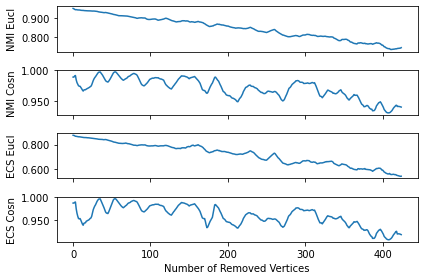

CPU times: user 3h 38min 57s, sys: 4h 9min 5s, total: 7h 48min 3s
Wall time: 4min 18s


In [9]:
%%time
### 1 Hope 方法
from gem.embedding.hope import HOPE  

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
    
    hope_model = HOPE(d=D, beta=0.01) 
    # A higher value of beta places more emphasis on capturing higher-order proximities
    embd = hope_model.learn_embedding(graph=G, is_weighted=False, no_python=True)
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="1HOPE", win=10)
save_scores_to_csv(scores, False, "1HOPE")
#Measure.append(scores)

Vertex 917 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 393 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 360 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 21 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 62 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 235 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 821 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 210 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 57 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 892 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 975 is removed. NMI&ECS: [1.0, 1.0, 

Vertex 932 is removed. NMI&ECS: [0.9975278277405828, 0.9975278277405828, 0.9965815267551754, 0.9965815267551754]
Vertex 233 is removed. NMI&ECS: [0.9975246363842202, 0.9975246363842202, 0.9965775747629848, 0.9965775747629848]
Vertex 169 is removed. NMI&ECS: [0.9975248495188156, 0.9975248495188156, 0.9965739892823225, 0.9965739892823225]
Vertex 558 is removed. NMI&ECS: [0.9975218973691505, 0.9975218973691505, 0.9965700193973659, 0.9965700193973659]
Vertex 929 is removed. NMI&ECS: [0.9975223600181776, 0.9975223600181775, 0.9965662804863854, 0.9965662804863854]
Vertex 300 is removed. NMI&ECS: [0.9975195153669901, 0.9975195153669901, 0.9965622924265555, 0.9965622924265555]
Vertex 582 is removed. NMI&ECS: [0.9975165330561727, 0.9975165330561727, 0.9965582950921678, 0.9965582950921678]
Vertex 585 is removed. NMI&ECS: [0.997516769126453, 0.997516769126453, 0.9965546761112889, 0.9965546761112889]
Vertex 32 is removed. NMI&ECS: [0.9950630977577211, 0.997513609059674, 0.9931037420037836, 0.99655

Vertex 19 is removed. NMI&ECS: [0.9893793491517475, 0.9867601605948997, 0.9851993446421667, 0.9827563999138813]
Vertex 444 is removed. NMI&ECS: [0.9893700353069275, 0.9893934432609268, 0.9851810774009738, 0.9863898144453286]
Vertex 799 is removed. NMI&ECS: [0.9893606516122071, 0.9893806495834714, 0.9851627865723946, 0.9863726081424782]
Vertex 779 is removed. NMI&ECS: [0.9893465843974523, 0.9893666101418892, 0.9851440052895749, 0.9863553582793674]
Vertex 697 is removed. NMI&ECS: [0.9893323942998808, 0.9893524480636633, 0.9851251763989407, 0.9863380646903679]
Vertex 802 is removed. NMI&ECS: [0.9893228422306035, 0.9893429216417567, 0.985106796212019, 0.9863212237017855]
Vertex 183 is removed. NMI&ECS: [0.9919900356725329, 0.9919701934262333, 0.9887681901797728, 0.9899820013464133]
Vertex 117 is removed. NMI&ECS: [0.9919837730652219, 0.9919674947160542, 0.9887543713800613, 0.9899697399200141]
Vertex 122 is removed. NMI&ECS: [0.9919723736788623, 0.9893088422673516, 0.9887400457385072, 0.986

Vertex 277 is removed. NMI&ECS: [0.9942991186369866, 0.9942991186369866, 0.9918032393605359, 0.9918032393605359]
Vertex 200 is removed. NMI&ECS: [0.9914008263430244, 0.9942913472666273, 0.9877298348063762, 0.9917918391371153]
Vertex 93 is removed. NMI&ECS: [0.994283508124502, 0.994283508124502, 0.9917804071581976, 0.9917804071581976]
Vertex 810 is removed. NMI&ECS: [0.9942804741341665, 0.9942804741341665, 0.9917694493504718, 0.9917694493504718]
Vertex 53 is removed. NMI&ECS: [0.9942774793373977, 0.9942774793373977, 0.9917584808075348, 0.9917584808075348]
Vertex 77 is removed. NMI&ECS: [0.9942685728646175, 0.9942685728646178, 0.9917469542072656, 0.9917469542072656]
Vertex 755 is removed. NMI&ECS: [0.9913535923150203, 0.9942651701581806, 0.9876456189266447, 0.9917360686658624]
Vertex 167 is removed. NMI&ECS: [0.9942619005632342, 0.994261900563234, 0.9917248881545494, 0.9917248881545494]
Vertex 388 is removed. NMI&ECS: [0.9942542783064328, 0.9914015563091837, 0.9917132658064518, 0.9875719

Vertex 989 is removed. NMI&ECS: [0.9852887316330203, 0.9821967098886233, 0.9790358029067707, 0.9744842957983154]
Vertex 546 is removed. NMI&ECS: [0.9852630321592855, 0.9852630321592855, 0.9790033505892889, 0.9790033505892889]
Vertex 109 is removed. NMI&ECS: [0.9852464025060207, 0.9852464025060209, 0.9789716175215665, 0.9789716175215665]
Vertex 337 is removed. NMI&ECS: [0.9829441498033832, 0.9852293398851247, 0.9759878655706147, 0.9789399730622045]
Vertex 85 is removed. NMI&ECS: [0.9852074168405331, 0.9789252791046859, 0.9789072202986931, 0.9697959144076898]
Vertex 532 is removed. NMI&ECS: [0.9851849693878592, 0.977987923706602, 0.9788743655016505, 0.9697333215077534]
Vertex 545 is removed. NMI&ECS: [0.9828667405876184, 0.9779708944998521, 0.9758754842862336, 0.9696909512521223]
Vertex 12 is removed. NMI&ECS: [0.9851381534297539, 0.9756643636893362, 0.9788083478938434, 0.9654219913425932]
Vertex 914 is removed. NMI&ECS: [0.969333692139342, 0.9756330788084596, 0.9580786643024587, 0.96536

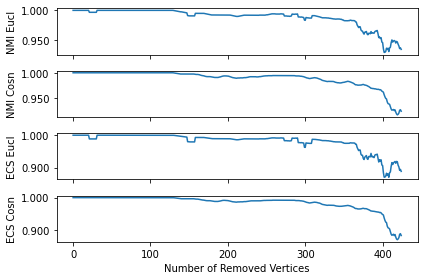

CPU times: user 3h 33min 11s, sys: 4h 30min 23s, total: 8h 3min 34s
Wall time: 4min 44s


In [10]:
%%time
### 2 Laplacian 方法
from gem.embedding.lap import LaplacianEigenmaps

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break

    lap_model = LaplacianEigenmaps(d=D)
    embd = lap_model.learn_embedding(graph=G, is_weighted=False, no_python=True)
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="2LAP", win=10)
save_scores_to_csv(scores, False, "2LAP")
#Measure.append(scores)

Vertex 917 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 393 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 360 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 21 is removed. NMI&ECS: [1.0000000000000002, 0.9999999999999998, 1.0, 1.0]
Vertex 62 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 235 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 821 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 210 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 57 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 892 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 975 is removed. NMI&E

Vertex 932 is removed. NMI&ECS: [0.9975278277405828, 0.9975278277405828, 0.9965815267551754, 0.9965815267551754]
Vertex 233 is removed. NMI&ECS: [0.9975246363842202, 0.9975246363842202, 0.9965775747629848, 0.9965775747629848]
Vertex 169 is removed. NMI&ECS: [0.9975248495188154, 0.9975248495188154, 0.9965739892823225, 0.9965739892823225]
Vertex 558 is removed. NMI&ECS: [0.9975218973691505, 0.9975218973691505, 0.9965700193973659, 0.9965700193973659]
Vertex 929 is removed. NMI&ECS: [0.9975223600181775, 0.9975223600181775, 0.9965662804863854, 0.9965662804863854]
Vertex 300 is removed. NMI&ECS: [0.9975195153669901, 0.9975195153669901, 0.9965622924265555, 0.9965622924265555]
Vertex 582 is removed. NMI&ECS: [0.9975165330561727, 0.9975165330561727, 0.9965582950921678, 0.9965582950921678]
Vertex 585 is removed. NMI&ECS: [0.997516769126453, 0.997516769126453, 0.9965546761112889, 0.9965546761112889]
Vertex 32 is removed. NMI&ECS: [0.9975136090596742, 0.9975136090596742, 0.9965506605822811, 0.9965

Vertex 19 is removed. NMI&ECS: [0.9920496605973363, 0.9920429505946425, 0.9888531099604969, 0.9888522590603298]
Vertex 444 is removed. NMI&ECS: [0.9947107110346859, 0.9947107110346859, 0.992535412327079, 0.992535412327079]
Vertex 799 is removed. NMI&ECS: [0.9920340128202457, 0.9947043310547947, 0.9888253692488839, 0.992525975427366]
Vertex 779 is removed. NMI&ECS: [0.9920234808346601, 0.9946973298344006, 0.9888112241466671, 0.9925165146367677]
Vertex 697 is removed. NMI&ECS: [0.9920128568493709, 0.9946902674572438, 0.9887970431886782, 0.9925070298644443]
Vertex 802 is removed. NMI&ECS: [0.9920066121008068, 0.9946873258900033, 0.9887833227311851, 0.9924980175118695]
Vertex 183 is removed. NMI&ECS: [0.994680861906888, 0.994680861906888, 0.9924884851325965, 0.9924884851325965]
Vertex 117 is removed. NMI&ECS: [0.9946778852627418, 0.9946778852627416, 0.9924793995325705, 0.9924793995325705]
Vertex 122 is removed. NMI&ECS: [0.9946703173712188, 0.9946703173712188, 0.9924698191498093, 0.9924698

Vertex 277 is removed. NMI&ECS: [0.9942991186369866, 0.9942991186369864, 0.9918032393605359, 0.9918032393605359]
Vertex 200 is removed. NMI&ECS: [0.9942913472666273, 0.9942913472666273, 0.9917918391371153, 0.9917918391371153]
Vertex 93 is removed. NMI&ECS: [0.994283508124502, 0.994283508124502, 0.9917804071581976, 0.9917804071581976]
Vertex 810 is removed. NMI&ECS: [0.9942804741341665, 0.9942804741341665, 0.9917694493504718, 0.9917694493504718]
Vertex 53 is removed. NMI&ECS: [0.9942774793373977, 0.9942774793373977, 0.9917584808075348, 0.9917584808075348]
Vertex 77 is removed. NMI&ECS: [0.9942685728646175, 0.9942685728646175, 0.9917469542072656, 0.9917469542072656]
Vertex 755 is removed. NMI&ECS: [0.9942651701581806, 0.9942651701581806, 0.9917360686658624, 0.9917360686658624]
Vertex 167 is removed. NMI&ECS: [0.9942619005632338, 0.994261900563234, 0.9917248881545494, 0.9917248881545494]
Vertex 388 is removed. NMI&ECS: [0.9942542783064328, 0.9942542783064329, 0.9917132658064518, 0.9917132

Vertex 989 is removed. NMI&ECS: [0.9830092840372342, 0.9821967098886231, 0.9760950354648315, 0.9744842957983154]
Vertex 546 is removed. NMI&ECS: [0.9820747658844912, 0.9821656066553416, 0.9744760638638598, 0.9744447978041952]
Vertex 109 is removed. NMI&ECS: [0.9829647331875718, 0.9852464025060207, 0.9760240869408162, 0.9789716175215665]
Vertex 337 is removed. NMI&ECS: [0.9405225631224517, 0.9852293398851245, 0.8762232890184114, 0.9789399730622045]
Vertex 85 is removed. NMI&ECS: [0.9829188341972869, 0.9820200193044726, 0.975950521660149, 0.9743197902611749]
Vertex 532 is removed. NMI&ECS: [0.9828929130291603, 0.977987923706602, 0.9759130614135136, 0.9697333215077534]
Vertex 545 is removed. NMI&ECS: [0.9748365922376485, 0.9779708944998521, 0.9640576649163721, 0.9696909512521223]
Vertex 12 is removed. NMI&ECS: [0.9819309422838951, 0.977935035921582, 0.9742418180601764, 0.9696435933634536]
Vertex 914 is removed. NMI&ECS: [0.982813109709466, 0.9779071714843873, 0.9757999771947977, 0.9695969

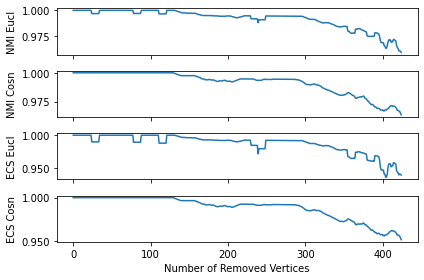

CPU times: user 4h 52min 58s, sys: 7h 4min 41s, total: 11h 57min 39s
Wall time: 7min 39s


In [11]:
%%time
### 3 LLE 方法
from auxpack.lle import lle

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break

    embd = lle(G, D)
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="3LLE", win=10)
save_scores_to_csv(scores, False, "3LLE")
#Measure.append(scores)

Vertex 917 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 393 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 360 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 21 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 62 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 235 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 821 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 210 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 57 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 892 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 975 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 888 is remove

Vertex 267 is removed. NMI&ECS: [0.9975883843236836, 0.9975883843236834, 0.9966698874179187, 0.9966698874179187]
Vertex 75 is removed. NMI&ECS: [0.9951110307632997, 0.9952003866755093, 0.9933257782695115, 0.9933337946451107]
Vertex 86 is removed. NMI&ECS: [0.9951340828943642, 0.9951340828943642, 0.9933519747614561, 0.9933519747614561]
Vertex 632 is removed. NMI&ECS: [0.997568396522953, 0.997568396522953, 0.9966571999241437, 0.9966571999241437]
Vertex 903 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 428 is removed. NMI&ECS: [0.9951206057666853, 0.9975546469552315, 0.9933297230896185, 0.9966486632360335]
Vertex 993 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 467 is removed. NMI&ECS: [0.9975576325877425, 0.9975576325877425, 0.9966420398330967, 0.9966420398330967]
Vertex 218 is removed. NMI&ECS: [0.9975546700136236, 0.9975546700136236, 0.9966382283005577, 0.9966382283005577]
Vertex 490 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 457 is removed. N

Vertex 331 is removed. NMI&ECS: [0.9947634589327585, 0.9947634589327585, 0.9927642989175497, 0.9927642989175497]
Vertex 579 is removed. NMI&ECS: [0.9948141388623337, 0.9922852461983653, 0.99272471661028, 0.9890934770011803]
Vertex 581 is removed. NMI&ECS: [0.9948036294414769, 0.9948036294414769, 0.9927164065673106, 0.9927164065673106]
Vertex 744 is removed. NMI&ECS: [0.9896118670210309, 0.9921709955324701, 0.9866624747941052, 0.9890893187226689]
Vertex 896 is removed. NMI&ECS: [0.9921618470322304, 0.9896003402485465, 0.9890798310227276, 0.985433059773617]
Vertex 148 is removed. NMI&ECS: [0.9948880609739587, 0.9948880609739587, 0.9927024939480403, 0.9927024939480403]
Vertex 396 is removed. NMI&ECS: [0.9868345818458696, 0.9868345818458696, 0.9830097039156773, 0.9830097039156773]
Vertex 455 is removed. NMI&ECS: [0.9895552961024273, 0.9973705800305176, 0.9853765486516749, 0.9963342415233953]
Vertex 275 is removed. NMI&ECS: [0.9947835272888003, 0.9947835272888003, 0.9926633088736361, 0.9926

Vertex 800 is removed. NMI&ECS: [0.9916323186219046, 0.9916623606220117, 0.9880441951230681, 0.9880925423638903]
Vertex 97 is removed. NMI&ECS: [0.9887535054539781, 0.9915383570577697, 0.9841144221220115, 0.9880656879658604]
Vertex 588 is removed. NMI&ECS: [0.9887468662831379, 0.988746866283138, 0.9853875008567675, 0.9853875008567675]
Vertex 326 is removed. NMI&ECS: [0.9895277849953938, 0.9895277849953937, 0.985450192346947, 0.985450192346947]
Vertex 555 is removed. NMI&ECS: [0.9802523644688406, 0.9859465292598668, 0.9748228379178966, 0.984014486196157]
Vertex 198 is removed. NMI&ECS: [0.9858504223429503, 0.9858504223429503, 0.9826882338306637, 0.9826882338306637]
Vertex 14 is removed. NMI&ECS: [0.9838267118973966, 0.9944477633800994, 0.9762063272987667, 0.993313087139618]
Vertex 764 is removed. NMI&ECS: [0.9858965686416249, 0.9858965686416249, 0.9799645799356896, 0.9799645799356896]
Vertex 672 is removed. NMI&ECS: [0.9859469297588556, 0.9887959605488541, 0.9812944824550655, 0.98528295

Vertex 574 is removed. NMI&ECS: [0.9765826175860428, 0.9758525673528546, 0.9681739786000606, 0.9695632802261912]
Vertex 114 is removed. NMI&ECS: [0.9817484912454674, 0.9757186097309487, 0.9766454398919461, 0.9708068147723048]
Vertex 156 is removed. NMI&ECS: [0.9765896807736955, 0.9736105018743535, 0.9694512941511877, 0.9665082616999585]
Vertex 322 is removed. NMI&ECS: [0.9695621031351538, 0.9665461239097902, 0.9620053425438179, 0.9576352042575059]
Vertex 970 is removed. NMI&ECS: [0.9757798821461785, 0.9757798821461785, 0.9663658275938359, 0.9663658275938359]
Vertex 791 is removed. NMI&ECS: [0.9672349445750056, 0.9641554767977565, 0.9576369213678556, 0.9561569177950918]
Vertex 315 is removed. NMI&ECS: [0.9825187021564962, 0.9764633845231, 0.9749743887988426, 0.9691003674097836]
Vertex 634 is removed. NMI&ECS: [0.9694644299178117, 0.9694897685825377, 0.9631911224207432, 0.9632521327548561]
Vertex 749 is removed. NMI&ECS: [0.9732543532278579, 0.9732543532278579, 0.9647307919562101, 0.9647

Vertex 544 is removed. NMI&ECS: [0.9480326432606819, 0.9537195383784638, 0.9340451227779772, 0.9415697206604904]
Vertex 945 is removed. NMI&ECS: [0.964231941775029, 0.9642076250925983, 0.9527491931337039, 0.9544237276570486]
Vertex 367 is removed. NMI&ECS: [0.9478501852591871, 0.9512399883621959, 0.9337535507657165, 0.9385989521446907]
Vertex 145 is removed. NMI&ECS: [0.9642243754232301, 0.9618739149791908, 0.9543532697534484, 0.9527935401962224]
Vertex 694 is removed. NMI&ECS: [0.9532056652504085, 0.9599502419439299, 0.941390771624283, 0.9494256749997945]
Vertex 954 is removed. NMI&ECS: [0.9476166277417981, 0.9476166277417981, 0.9337024066769206, 0.9337024066769206]
Vertex 15 is removed. NMI&ECS: [0.9498155541206731, 0.9498155541206731, 0.9347045858351846, 0.9347045858351846]
Vertex 919 is removed. NMI&ECS: [0.947383426275704, 0.9475303906878326, 0.9321115556613806, 0.9318981387453855]
Vertex 719 is removed. NMI&ECS: [0.9515190137621814, 0.9517358763492738, 0.9319949021541686, 0.93647

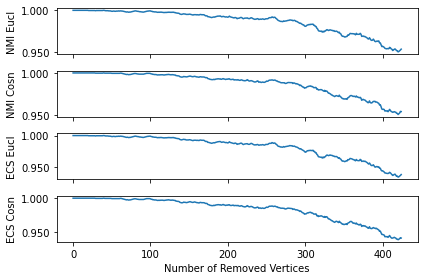

CPU times: user 3h 11min 35s, sys: 3h 20min 49s, total: 6h 32min 25s
Wall time: 6min 33s


In [12]:
%%time
### 4 DeepWalk方法
from auxpack.DeepWalk import DeepWalk

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
 
    model = DeepWalk(dimensions=D, walk_length=16, window_size=10, walk_number=10, workers=wk)
    model.fit(G)
    embd = model.get_embedding()
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="4DeepWalk", win=10)
save_scores_to_csv(scores, False, "4DeepWalk")
#Measure.append(scores)

Vertex 917 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 393 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 360 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 21 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 62 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 235 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 821 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 210 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 57 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 892 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 975 is removed. NMI&ECS: [1.0, 1.0, 

Vertex 233 is removed. NMI&ECS: [0.9975246363842202, 0.9975246363842202, 0.9965775747629848, 0.9965775747629848]
Vertex 169 is removed. NMI&ECS: [0.9975248495188156, 0.9975248495188154, 0.9965739892823225, 0.9965739892823225]
Vertex 558 is removed. NMI&ECS: [0.9975218973691505, 0.9975218973691505, 0.9965700193973659, 0.9965700193973659]
Vertex 929 is removed. NMI&ECS: [0.9975223600181776, 0.9975223600181775, 0.9965662804863854, 0.9965662804863854]
Vertex 300 is removed. NMI&ECS: [0.9975195153669899, 0.9975195153669901, 0.9965622924265555, 0.9965622924265555]
Vertex 582 is removed. NMI&ECS: [0.9975165330561727, 0.9975165330561727, 0.9965582950921678, 0.9965582950921678]
Vertex 585 is removed. NMI&ECS: [0.997516769126453, 0.9975167691264533, 0.9965546761112889, 0.9965546761112889]
Vertex 32 is removed. NMI&ECS: [0.9975136090596742, 0.997513609059674, 0.9965506605822811, 0.9965506605822811]
Vertex 207 is removed. NMI&ECS: [0.9975107772778117, 0.9975107772778117, 0.9965466356821437, 0.9965

Vertex 444 is removed. NMI&ECS: [0.9920401842326927, 0.9920401842326925, 0.9888390356043864, 0.9888390356043864]
Vertex 799 is removed. NMI&ECS: [0.9920340128202457, 0.9920340128202457, 0.9888253692488839, 0.9888253692488839]
Vertex 779 is removed. NMI&ECS: [0.9920234808346601, 0.9920234808346601, 0.9888112241466671, 0.9888112241466671]
Vertex 697 is removed. NMI&ECS: [0.9920128568493709, 0.9920128568493708, 0.9887970431886782, 0.9887970431886782]
Vertex 802 is removed. NMI&ECS: [0.992006612100807, 0.992006612100807, 0.9887833227311851, 0.9887833227311851]
Vertex 183 is removed. NMI&ECS: [0.9946808619068881, 0.994680861906888, 0.9924884851325965, 0.9924884851325965]
Vertex 117 is removed. NMI&ECS: [0.9946778852627418, 0.9946778852627418, 0.9924793995325705, 0.9924793995325705]
Vertex 122 is removed. NMI&ECS: [0.9919710066881464, 0.9946703173712188, 0.9887017976754486, 0.9924698191498093]
Vertex 787 is removed. NMI&ECS: [0.9946631432974415, 0.9946631432974413, 0.9924602143272963, 0.9924

Vertex 200 is removed. NMI&ECS: [0.9942168455625021, 0.9942168455625023, 0.9917847822867119, 0.9917847822867119]
Vertex 93 is removed. NMI&ECS: [0.9971311351059341, 0.9971311351059341, 0.9958895476104295, 0.9958895476104295]
Vertex 810 is removed. NMI&ECS: [0.991353779246587, 0.991353779246587, 0.9876475013446945, 0.9876475013446945]
Vertex 53 is removed. NMI&ECS: [0.9942774793373977, 0.9942774793373977, 0.9917584808075348, 0.9917584808075348]
Vertex 77 is removed. NMI&ECS: [0.9942685728646177, 0.9942685728646177, 0.9917469542072656, 0.9917469542072656]
Vertex 755 is removed. NMI&ECS: [0.9914202781904874, 0.9942651701581806, 0.9876063121881078, 0.9917360686658624]
Vertex 167 is removed. NMI&ECS: [0.994261900563234, 0.994261900563234, 0.9917248881545494, 0.9917248881545494]
Vertex 388 is removed. NMI&ECS: [0.9942542783064328, 0.9942542783064329, 0.9917132658064518, 0.9917132658064518]
Vertex 419 is removed. NMI&ECS: [0.9912949349153763, 0.9912949349153765, 0.9875448783882573, 0.98754487

Vertex 546 is removed. NMI&ECS: [0.9758912120264222, 0.9758912120264222, 0.9654674776229826, 0.9654674776229826]
Vertex 109 is removed. NMI&ECS: [0.9790538103318593, 0.975935475534704, 0.9699490644803158, 0.9669473044654912]
Vertex 337 is removed. NMI&ECS: [0.9667279340255978, 0.9750409049286867, 0.952238243204285, 0.9652756856163517]
Vertex 85 is removed. NMI&ECS: [0.972638957329945, 0.9726389573299449, 0.9623631413829807, 0.9623631413829807]
Vertex 532 is removed. NMI&ECS: [0.9642352039405985, 0.9694217706672198, 0.9491660397149787, 0.957762757696432]
Vertex 545 is removed. NMI&ECS: [0.9662066489216898, 0.9726150373229563, 0.9532577713714335, 0.9622497098468344]
Vertex 12 is removed. NMI&ECS: [0.9723493391704277, 0.9724763893797413, 0.9621514443836101, 0.9605795155043]
Vertex 914 is removed. NMI&ECS: [0.9692567797235375, 0.9724137162973718, 0.9577807828766243, 0.9621216831457733]
Vertex 251 is removed. NMI&ECS: [0.9691582149178711, 0.972435091339248, 0.9578732949535319, 0.96206950997

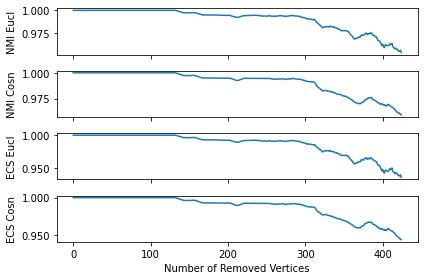

CPU times: user 5h 30min 19s, sys: 12h 30min 8s, total: 18h 28s
Wall time: 15min 18s


In [13]:
%%time
### 5 MNMF 方法
from karateclub import MNMF

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break

    # Create an instance of the MNMF model
    MNMF_model = MNMF(dimensions = D, clusters = K, lambd = 0.2, 
                 alpha = 0.05, beta = 0.05, iterations = 100, 
                 lower_control = 1e-15, eta = 5.0, seed = 42)

    # Fit the model to the graph
    H = nx.relabel.convert_node_labels_to_integers(G)
    MNMF_model.fit(H)
    # Obtain the graph embeddings
    embd = MNMF_model.get_embedding()
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="5MNMF", win=10)
save_scores_to_csv(scores, False, "5MNMF")
#Measure.append(scores)

Vertex 917 is removed. 

2023-07-05 03:02:15.386649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 03:02:17.387437: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38271 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:02:00.0, compute capability: 8.0
2023-07-05 03:02:17.389297: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38271 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2023-07-05 03:02:17.390504: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 393 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 360 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 21 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 62 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [0.9977966617859688, 0.9977543646957745, 0.9970116409128505, 0.9970081782354583]
Vertex 39 is removed. NMI&ECS: [0.9815526393449351, 0.9933911543548603, 0.974439822059577, 0.9910482497143357]
Vertex 235 is removed. NMI&ECS: [0.9159294187978844, 0.9301727433897596, 0.8855147869389267, 0.9160044310924573]
Vertex 821 is removed. NMI&ECS: [0.7756554432298515, 0.8528728935104644, 0.6631264084559768, 0.8334717915760914]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 210 is r

Vertex 993 is removed. NMI&ECS: [0.9976121234693245, 0.9976368466909569, 0.9966499990402519, 0.9966530448919414]
Vertex 467 is removed. NMI&ECS: [0.993327229143509, 0.9884843989700577, 0.9900107939535893, 0.9855993153876866]
Vertex 218 is removed. NMI&ECS: [0.9952238045003601, 0.9927716458457246, 0.9932906939782299, 0.9899580731370959]
Vertex 490 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 457 is removed. NMI&ECS: [0.9830674085919923, 0.9855236863550021, 0.9798861228558639, 0.9821345711998273]
Vertex 531 is removed. NMI&ECS: [0.9769023931961984, 0.985295695372575, 0.9712112489820288, 0.982124340001399]
Vertex 756 is removed. NMI&ECS: [0.9707150110892134, 0.9756948615083583, 0.9642948925606414, 0.9698527546186763]
Vertex 591 is removed. NMI&ECS: [0.9732493239189798, 0.9878157082375477, 0.9626334372664679, 0.9831047801592999]
Vertex 240 is removed. NMI&ECS: [0.9851843563308997, 0.98101082195281, 0.9820600580563577, 0.9743531407548844]
Vertex 862 is removed. NMI&ECS: [

Vertex 896 is removed. NMI&ECS: [0.9947982736521916, 0.9947982736521916, 0.9926982042979635, 0.9926982042979635]
Vertex 148 is removed. NMI&ECS: [0.9870206284525237, 0.9870100868169954, 0.9830230760538434, 0.9841996314497433]
Vertex 396 is removed. NMI&ECS: [0.9921486119271536, 0.9921486119271536, 0.9890181281339756, 0.9890181281339756]
Vertex 455 is removed. NMI&ECS: [0.9894966564651276, 0.9869532624211131, 0.9853731419326786, 0.982936608711811]
Vertex 275 is removed. NMI&ECS: [0.992193402054263, 0.9921794699377308, 0.9889962650309104, 0.9889944010762979]
Vertex 900 is removed. NMI&ECS: [0.9928292353227567, 0.9850126188613821, 0.9891485747617125, 0.9781782165946651]
Vertex 20 is removed. NMI&ECS: [0.9769682598267715, 0.9744840793924494, 0.970979789350417, 0.9649718462025734]
Vertex 325 is removed. NMI&ECS: [0.9842825692480712, 0.9850266835223551, 0.9792336459536972, 0.9793228170571399]
Vertex 812 is removed. NMI&ECS: [0.979172647634371, 0.9765392248718958, 0.9755078076222006, 0.969490

Vertex 555 is removed. NMI&ECS: [0.8996077425619581, 0.9098855509087226, 0.8767742715219613, 0.8915225365656549]
Vertex 198 is removed. NMI&ECS: [0.925256770595127, 0.9299649971558396, 0.9085046777344266, 0.9159332295592698]
Vertex 14 is removed. NMI&ECS: [0.893324510306225, 0.8899578700526866, 0.8621890886435908, 0.8545864276742055]
Vertex 764 is removed. NMI&ECS: [0.8867471728184064, 0.8782899461903584, 0.8677818007605745, 0.8589139894992439]
Vertex 672 is removed. NMI&ECS: [0.8788736542760354, 0.8932154090982454, 0.8485421810202425, 0.8787105641072379]
Vertex 702 is removed. NMI&ECS: [0.8692844712738093, 0.8706439702289367, 0.849792568157194, 0.8449045508167862]
Vertex 686 is removed. NMI&ECS: [0.9228979378463782, 0.9168095190717855, 0.9067570512946806, 0.8988658140906494]
Vertex 715 is removed. NMI&ECS: [0.8545150453326293, 0.8524074684212949, 0.8310176800213321, 0.8314754738229673]
Vertex 713 is removed. NMI&ECS: [0.8620100200617161, 0.8545364083178955, 0.8419600465392908, 0.82173

Vertex 970 is removed. NMI&ECS: [0.5748885602524932, 0.5580393588746292, 0.5026752674859168, 0.4715052413862796]
Vertex 791 is removed. NMI&ECS: [0.6701515438462994, 0.668291928704258, 0.6265007733868738, 0.6269996509286117]
Vertex 315 is removed. NMI&ECS: [0.5740647954906528, 0.5520092454748888, 0.4895059384282962, 0.4743539392483594]
Vertex 634 is removed. NMI&ECS: [0.6292668086331112, 0.6192749056039992, 0.5604597801721116, 0.5624152168648215]
Vertex 749 is removed. NMI&ECS: [0.653758183925541, 0.6269843837242177, 0.5923551748619629, 0.5517357638126305]
Vertex 846 is removed. NMI&ECS: [0.5306544543582556, 0.5072314647269545, 0.45385715692139855, 0.4218061925513426]
Vertex 129 is removed. NMI&ECS: [0.5675386280331601, 0.5730232580443937, 0.4933896465205886, 0.5108365696474888]
Vertex 603 is removed. NMI&ECS: [0.5379172205235927, 0.5250549475581199, 0.4244154000871337, 0.4304684707928244]
Vertex 347 is removed. NMI&ECS: [0.5372762280530615, 0.5182190906221193, 0.42775769220270665, 0.4

Vertex 145 is removed. NMI&ECS: [0.2506770221641789, 0.23521278867821913, 0.1943733602969594, 0.185431752949948]
Vertex 694 is removed. NMI&ECS: [0.20599570276310447, 0.2154645043236126, 0.1580337859387009, 0.1708809646297935]
Vertex 954 is removed. NMI&ECS: [0.2486510733636352, 0.24417372503815432, 0.20688718242531923, 0.20366973050603784]
Vertex 15 is removed. NMI&ECS: [0.21372798507367613, 0.19824356320023231, 0.17479279633430544, 0.1682645139038972]
Vertex 919 is removed. NMI&ECS: [0.2670968620684975, 0.23779917259298666, 0.21225425168398676, 0.19874475990607038]
Vertex 719 is removed. NMI&ECS: [0.2636367724217829, 0.2695922970250322, 0.20466703912024758, 0.20945596666726166]
Vertex 407 is removed. NMI&ECS: [0.25281959735306253, 0.22023453838180443, 0.20473347872056885, 0.17613623344873372]
Vertex 131 is removed. NMI&ECS: [0.28191181818843575, 0.3160093659318181, 0.22115913313777522, 0.24973196501346093]
Vertex 336 is removed. NMI&ECS: [0.19768804840708695, 0.17004218132928303, 0.1

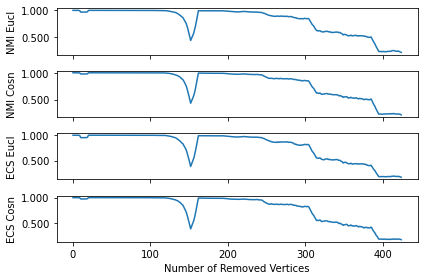

CPU times: user 3h 23min 9s, sys: 3h 19min 30s, total: 6h 42min 40s
Wall time: 20min 30s


In [14]:
%%time
### 6 LINE 方法
from ge import LINE

idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
        
    model = LINE(G,embedding_size=D,order='first');
    model.train(batch_size=8192,epochs=50,verbose=0);# train model
    LINE_embd = model.get_embeddings();# get embedding vectors
    embd = list(LINE_embd.values())
    
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="6LINE", win=10)
save_scores_to_csv(scores, False, "6LINE")
#Measure.append(scores)

Vertex 917 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 393 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 360 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 21 is removed. NMI&ECS: [1.0000000000000002, 0.9999999999999998, 1.0, 1.0]
Vertex 62 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 235 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 821 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 182 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 495 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 210 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 57 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 892 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 975 is

Vertex 218 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 490 is removed. NMI&ECS: [1.0000000000000002, 1.0000000000000002, 1.0, 1.0]
Vertex 457 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 531 is removed. NMI&ECS: [0.9975488846250343, 0.9975488846250343, 0.996627084563683, 0.996627084563683]
Vertex 756 is removed. NMI&ECS: [0.9975461743373648, 0.9975461743373649, 0.9966232385939722, 0.9966232385939722]
Vertex 591 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 240 is removed. NMI&ECS: [0.9999999999999998, 1.0, 1.0, 1.0]
Vertex 862 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 125 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 640 is removed. NMI&ECS: [0.9975384432065713, 0.9975384432065713, 0.9966045932850747, 0.9966045932850747]
Vertex 348 is removed. NMI&ECS: [0.9975357672008699, 0.9975357672008699, 0.9966006949995236, 0.9966006949995236]
Vertex 525 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 238 is removed. NMI&ECS: [0.9951100843615172

Vertex 20 is removed. NMI&ECS: [0.99211880844755, 0.9921188084475497, 0.9890000759389375, 0.9890000759389375]
Vertex 325 is removed. NMI&ECS: [0.9947096633260804, 0.9947096633260805, 0.9926673248011543, 0.9926673248011543]
Vertex 812 is removed. NMI&ECS: [0.9921030168000219, 0.992103016800022, 0.9889730494075444, 0.9889730494075444]
Vertex 406 is removed. NMI&ECS: [0.9947555806519484, 0.994800044037387, 0.9926177858213883, 0.992622927799432]
Vertex 551 is removed. NMI&ECS: [0.9947492602339602, 0.9947492602339602, 0.9926085580536652, 0.9926085580536652]
Vertex 82 is removed. NMI&ECS: [0.9920888835172517, 0.9920888835172514, 0.9889338775419836, 0.9889338775419836]
Vertex 376 is removed. NMI&ECS: [0.9920778309196794, 0.9920778309196792, 0.9889200102206076, 0.9889200102206076]
Vertex 664 is removed. NMI&ECS: [0.9973874246140253, 0.9973874246140251, 0.9962922009659777, 0.9962922009659777]
Vertex 224 is removed. NMI&ECS: [0.9920617849732223, 0.9946781996159701, 0.9888926237643283, 0.99260508

Vertex 686 is removed. NMI&ECS: [0.994372675441841, 0.994372675441841, 0.9919249403135564, 0.9919249403135564]
Vertex 715 is removed. NMI&ECS: [0.9943693836233347, 0.9943693836233346, 0.9919144981551288, 0.9919144981551288]
Vertex 713 is removed. NMI&ECS: [0.9971697338106209, 0.9971697338106209, 0.9959511833997431, 0.9959511833997431]
Vertex 329 is removed. NMI&ECS: [0.988702314934913, 0.988702314934913, 0.983827496132976, 0.983827496132976]
Vertex 761 is removed. NMI&ECS: [0.9943493994482531, 0.9943493994482533, 0.9918815215118566, 0.9918815215118566]
Vertex 655 is removed. NMI&ECS: [0.9914789794120881, 0.9914789794120881, 0.9878475000348736, 0.9878475000348736]
Vertex 572 is removed. NMI&ECS: [0.9943343524948564, 0.9943343524948564, 0.9918591257091307, 0.9918591257091307]
Vertex 933 is removed. NMI&ECS: [0.9915595451844414, 0.9915595451844414, 0.9891384668513243, 0.9891384668513243]
Vertex 831 is removed. NMI&ECS: [0.9971507817501462, 0.9971507817501462, 0.9959179739755025, 0.9959179

Vertex 129 is removed. NMI&ECS: [0.9785108250084509, 0.9785108250084509, 0.9718515203355965, 0.9718515203355965]
Vertex 603 is removed. NMI&ECS: [0.9703670808232413, 0.9673028925071769, 0.9617310168758945, 0.9602347037303126]
Vertex 347 is removed. NMI&ECS: [0.9710488119994362, 0.9649456898740102, 0.9615637105420957, 0.9556885285284731]
Vertex 334 is removed. NMI&ECS: [0.9784607469009462, 0.9763337030025203, 0.9701808243411276, 0.9674115989113033]
Vertex 446 is removed. NMI&ECS: [0.9784546681762609, 0.981583610091543, 0.9718130170652299, 0.9776527244926756]
Vertex 837 is removed. NMI&ECS: [0.9754137953419054, 0.9754137953419054, 0.9672073557883997, 0.9672073557883997]
Vertex 897 is removed. NMI&ECS: [0.977000035438192, 0.9792115728087502, 0.9703617441799459, 0.9746016622951679]
Vertex 885 is removed. NMI&ECS: [0.9875866827531659, 0.9845247537135926, 0.9834593943920483, 0.9819522226083787]
Vertex 418 is removed. NMI&ECS: [0.9814191236050758, 0.9814191236050757, 0.9759405148130652, 0.975

Vertex 131 is removed. NMI&ECS: [0.9698200391859819, 0.966435643506669, 0.9602730140673682, 0.9602756784283863]
Vertex 336 is removed. NMI&ECS: [0.956423171099353, 0.9529211609903269, 0.942283195581439, 0.9404404128537548]
Vertex 56 is removed. NMI&ECS: [0.9471392535307241, 0.9429722069528963, 0.9293602354747582, 0.9245861625508522]
Vertex 289 is removed. NMI&ECS: [0.973878985055771, 0.9704605633154432, 0.9651446687211868, 0.9617757272912788]
Vertex 930 is removed. NMI&ECS: [0.9591267407951833, 0.9524386271106324, 0.942419653165353, 0.9375646431682434]
Vertex 36 is removed. NMI&ECS: [0.9628565523989329, 0.9661335456639358, 0.9499036422855174, 0.9549516549518142]
Vertex 618 is removed. NMI&ECS: [0.9513848229660533, 0.9537869374470306, 0.9323501202146132, 0.93700019894509]
Vertex 696 is removed. NMI&ECS: [0.9424659846502648, 0.950127963305794, 0.9287000390730614, 0.9337491013222808]
Vertex 112 is removed. NMI&ECS: [0.9566923634003494, 0.9567814097529732, 0.9448374198032508, 0.94322829547

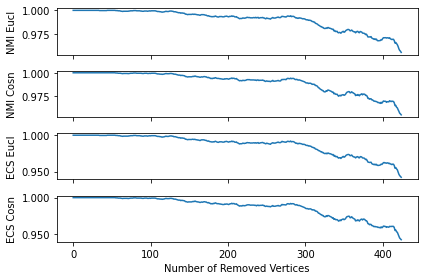

CPU times: user 4h 41min 5s, sys: 3h 19min 6s, total: 8h 12s
Wall time: 1h 31min 11s


In [15]:
%%time
### 7 Node2Vec 方法 以后使用这个
from node2vec import Node2Vec

nodes_range = np.array(range(G0.number_of_nodes()))
idx = [True] *(G0.number_of_nodes())
G=G0.copy()

scores=[]

for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print("In total", temp.index(i), "vertices are removed. G is now disconnected!!")
        break
    
    # Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
    node2vec_model = Node2Vec(G, dimensions=D, walk_length=16, num_walks=10, workers=wk, quiet=True) #, temp_folder='test' # Use temp_folder for big graphs
    # Embed nodes 
    node2vec_fit = node2vec_model.fit(window=10, min_count=1, batch_words=20000)  
    # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed 
    # (from the Node2Vec constructor)

    idx[i] = False

    nodes = [str(x) for x in nodes_range[idx]]
    embd = np.array([node2vec_fit.wv[node] for node in nodes])
    
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)
    
quar_plot(scores=scores, disturb=False, filename="7Node2Vec", win=10)
save_scores_to_csv(scores, False, "7Node2Vec")
#Measure.append(scores)